In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 15})

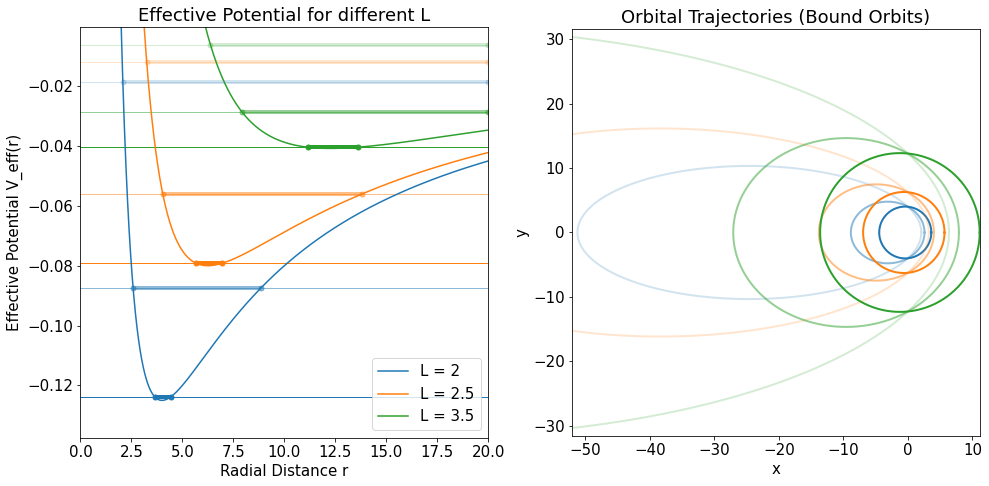

In [70]:
#
# Effectiv potential and orbits for different values of angular momenum L
#

# Constants
G = 1     # Gravitational constant
M = 1     # Mass of the central body
m = 1     # Mass of the orbiting body (set to 1 for simplicity)

# Angular momenta
L_values = [2, 2.5, 3.5]

# Colors for plotting
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Initialize running min and max for x and y coordinates
x_min_overall = float('inf')
x_max_overall = float('-inf')
y_min_overall = float('inf')
y_max_overall = float('-inf')

for i, L in enumerate(L_values):
    color = colors[i]
    # Radial coordinate
    r = np.linspace(0.1, 20, 10000)
    # Effective potential V_eff(r) = -GMm/r + L^2/(2mr^2)
    V_eff = -G * M * m / r + L**2 / (2 * m * r**2)

    # Only consider negative effective potentials
    negative_V_eff_indices = V_eff < 0
    r_neg = r[negative_V_eff_indices]
    V_eff_neg = V_eff[negative_V_eff_indices]

    # Plot effective potential where it's negative
    ax1.plot(r_neg, V_eff_neg, color=color, label=f'L = {L}')

    # Find minimum of V_eff
    r_Vmin = L**2 / (G * M * m**2)
    V_min = -G * M * m / (2 * r_Vmin)

    # Select negative energy levels
    E_circular = V_min + 0.01 * abs(V_min)   # Slightly above minimum (negative)
    E_lower = V_min + 0.3 * abs(V_min)  # Intermediate negative energy
    E_higher = -0.15 * abs(V_min)                       # Slightly less than zero (negative)

    E_levels = [E_circular, E_lower, E_higher]
    shades = [1.0, 0.5, 0.2]  # Shades for energy levels

    for E, shade in zip(E_levels, shades):
        # Only consider negative energies
        if E < 0:
            # Compute turning points (radii where E = V_eff(r))
            # Quadratic in r: a r^2 + b r + c = 0
            a = 2 * m * E
            b = 2 * G * M * m**2
            c = -L**2
            discriminant = b**2 - 4 * a * c
            if discriminant >= 0:
                sqrt_discriminant = np.sqrt(discriminant)
                r1 = (-b + sqrt_discriminant) / (2 * a)
                r2 = (-b - sqrt_discriminant) / (2 * a)
                # Ensure positive roots
                r_turning_points = [r for r in [r1, r2] if r > 0]
                if len(r_turning_points) == 2:
                    r_min_approach = min(r_turning_points)
                    r_max_approach = max(r_turning_points)
                    # Plot horizontal line for energy level
                    # Use solid line, thicker between r_min_approach and r_max_approach
                    # Plot the energy level line
                    ax1.hlines(E, 0, r_neg[-1], colors=color, linestyles='-', alpha=shade, linewidth=1)
                    # Thicken the line between r_min_approach and r_max_approach
                    # Ensure that r_min_approach and r_max_approach are within plotting range
                    r_min_approach = max(r_neg[0], min(r_neg[-1], r_min_approach))
                    r_max_approach = max(r_neg[0], min(r_neg[-1], r_max_approach))
                    ax1.hlines(E, r_min_approach, r_max_approach, colors=color, linestyles='-', 
                               alpha=shade, linewidth=4)
                    # Mark the turning points with small filled circles
                    ax1.plot([r_min_approach, r_max_approach], [E, E], 'o', color=color, 
                             alpha=shade, markersize=5)
                    # Compute eccentricity
                    e_squared = 1 + (2 * E * L**2) / (G**2 * M**2 * m**3)
                    # Ensure that e_squared results in real eccentricity
                    if e_squared >= 0:
                        e = np.sqrt(e_squared)
                        if e < 1:
                            # Define true anomaly range for ellipse
                            theta = np.linspace(0, 2 * np.pi, 500)
                            # Semi-latus rectum
                            p = L**2 / (G * M * m**2)
                            # Orbit equation: r(θ) = p / (1 + e * cos(θ))
                            r_orbit = p / (1 + e * np.cos(theta))
                            # Plot orbit
                            x_orbit = r_orbit * np.cos(theta)
                            y_orbit = r_orbit * np.sin(theta)
                            ax2.plot(x_orbit, y_orbit, color=color, alpha=shade, linewidth=2)
                            # Update running min and max for x
                            x_min_overall = min(x_min_overall, x_orbit.min())
                            x_max_overall = max(x_max_overall, x_orbit.max())
                            # Update running min and max for y
                            y_min_overall = min(y_min_overall, y_orbit.min())
                            y_max_overall = max(y_max_overall, y_orbit.max())
                else:
                    # No valid turning points
                    pass
            else:
                # No real turning points; invalid energy level for this potential
                pass

# Customize left plot (Effective Potential)
ax1.set_xlabel('Radial Distance r')
ax1.set_ylabel('Effective Potential V_eff(r)')
ax1.set_title('Effective Potential for different L')
ax1.set_xlim(0, 20)
# Adjust y-limits to show the curves without too much white space
V_eff_min_all = []
V_eff_max_all = []
for L in L_values:
    # Recompute V_eff for plotting limits
    r_plot = np.linspace(0.1, 20, 1000)
    V_eff_plot = -G * M * m / r_plot + L**2 / (2 * m * r_plot**2)
    V_eff_neg_plot = V_eff_plot[V_eff_plot < 0]
    V_eff_min_all.append(V_eff_neg_plot.min())
    V_eff_max_all.append(V_eff_neg_plot.max())

ax1.set_ylim(min(V_eff_min_all) * 1.1, max(V_eff_max_all) * 1.1)
ax1.legend()

# Customize right plot (Orbits)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Orbital Trajectories (Bound Orbits)')
#ax2.set_aspect('equal', 'box')

# Set X,Y limits to make it square
ax2.set_xlim(-(y_max_overall-y_min_overall-x_max_overall), x_max_overall)
ax2.set_ylim(y_min_overall, y_max_overall)

# Adjust layout and display the plot
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

# Save plot
plt.savefig("../Figures/kepler_effective_potential_l.png", format="png", dpi=300, transparent=False, 
            facecolor='white')

plt.show()


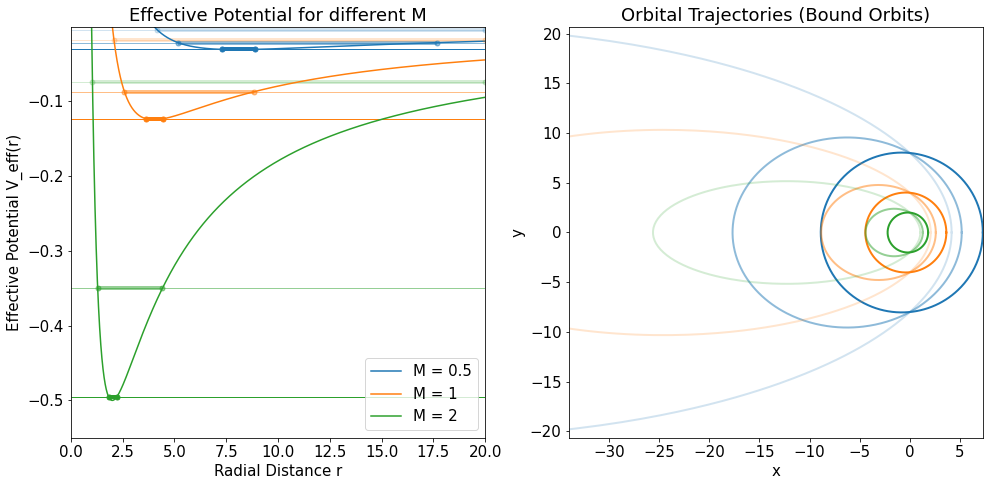

In [71]:
#
# Effectiv potential and orbits for different values of mass M
#
# Constants
G = 1     # Gravitational constant
L = 2     # Mass of the central body
m = 1     # Mass of the orbiting body (set to 1 for simplicity)

# Angular momenta
M_values = [0.5, 1, 2]

# Colors for plotting
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Initialize running min and max for x and y coordinates
x_min_overall = float('inf')
x_max_overall = float('-inf')
y_min_overall = float('inf')
y_max_overall = float('-inf')

for i, M in enumerate(M_values):
    color = colors[i]
    # Radial coordinate
    r = np.linspace(0.1, 20, 10000)
    # Effective potential V_eff(r) = -GMm/r + L^2/(2mr^2)
    V_eff = -G * M * m / r + L**2 / (2 * m * r**2)

    # Only consider negative effective potentials
    negative_V_eff_indices = V_eff < 0
    r_neg = r[negative_V_eff_indices]
    V_eff_neg = V_eff[negative_V_eff_indices]

    # Plot effective potential where it's negative
    ax1.plot(r_neg, V_eff_neg, color=color, label=f'M = {M}')

    # Find minimum of V_eff
    r_Vmin = L**2 / (G * M * m**2)
    V_min = -G * M * m / (2 * r_Vmin)

    # Select negative energy levels
    E_circular = V_min + 0.01 * abs(V_min)   # Slightly above minimum (negative)
    E_lower = V_min + 0.3 * abs(V_min)  # Intermediate negative energy
    E_higher = -0.15 * abs(V_min)                       # Slightly less than zero (negative)

    E_levels = [E_circular, E_lower, E_higher]
    shades = [1.0, 0.5, 0.2]  # Shades for energy levels

    for E, shade in zip(E_levels, shades):
        # Only consider negative energies
        if E < 0:
            # Compute turning points (radii where E = V_eff(r))
            # Quadratic in r: a r^2 + b r + c = 0
            a = 2 * m * E
            b = 2 * G * M * m**2
            c = -L**2
            discriminant = b**2 - 4 * a * c
            if discriminant >= 0:
                sqrt_discriminant = np.sqrt(discriminant)
                r1 = (-b + sqrt_discriminant) / (2 * a)
                r2 = (-b - sqrt_discriminant) / (2 * a)
                # Ensure positive roots
                r_turning_points = [r for r in [r1, r2] if r > 0]
                if len(r_turning_points) == 2:
                    r_min_approach = min(r_turning_points)
                    r_max_approach = max(r_turning_points)
                    # Plot horizontal line for energy level
                    # Use solid line, thicker between r_min_approach and r_max_approach
                    # Plot the energy level line
                    ax1.hlines(E, 0, r_neg[-1], colors=color, linestyles='-', alpha=shade, linewidth=1)
                    # Thicken the line between r_min_approach and r_max_approach
                    # Ensure that r_min_approach and r_max_approach are within plotting range
                    r_min_approach = max(r_neg[0], min(r_neg[-1], r_min_approach))
                    r_max_approach = max(r_neg[0], min(r_neg[-1], r_max_approach))
                    ax1.hlines(E, r_min_approach, r_max_approach, colors=color, linestyles='-', 
                               alpha=shade, linewidth=4)
                    # Mark the turning points with small filled circles
                    ax1.plot([r_min_approach, r_max_approach], [E, E], 'o', color=color, 
                             alpha=shade, markersize=5)
                    # Compute eccentricity
                    e_squared = 1 + (2 * E * L**2) / (G**2 * M**2 * m**3)
                    # Ensure that e_squared results in real eccentricity
                    if e_squared >= 0:
                        e = np.sqrt(e_squared)
                        if e < 1:
                            # Define true anomaly range for ellipse
                            theta = np.linspace(0, 2 * np.pi, 500)
                            # Semi-latus rectum
                            p = L**2 / (G * M * m**2)
                            # Orbit equation: r(θ) = p / (1 + e * cos(θ))
                            r_orbit = p / (1 + e * np.cos(theta))
                            # Plot orbit
                            x_orbit = r_orbit * np.cos(theta)
                            y_orbit = r_orbit * np.sin(theta)
                            ax2.plot(x_orbit, y_orbit, color=color, alpha=shade, linewidth=2)
                            # Update running min and max for x
                            x_min_overall = min(x_min_overall, x_orbit.min())
                            x_max_overall = max(x_max_overall, x_orbit.max())
                            # Update running min and max for y
                            y_min_overall = min(y_min_overall, y_orbit.min())
                            y_max_overall = max(y_max_overall, y_orbit.max())
                else:
                    # No valid turning points
                    pass
            else:
                # No real turning points; invalid energy level for this potential
                pass

# Customize left plot (Effective Potential)
ax1.set_xlabel('Radial Distance r')
ax1.set_ylabel('Effective Potential V_eff(r)')
ax1.set_title('Effective Potential for different M')
ax1.set_xlim(0, 20)
# Adjust y-limits to show the curves without too much white space
V_eff_min_all = []
V_eff_max_all = []
for L in L_values:
    # Recompute V_eff for plotting limits
    r_plot = np.linspace(0.1, 20, 1000)
    V_eff_plot = -G * M * m / r_plot + L**2 / (2 * m * r_plot**2)
    V_eff_neg_plot = V_eff_plot[V_eff_plot < 0]
    V_eff_min_all.append(V_eff_neg_plot.min())
    V_eff_max_all.append(V_eff_neg_plot.max())

ax1.set_ylim(min(V_eff_min_all) * 1.1, max(V_eff_max_all) * 1.1)
ax1.legend()

# Customize right plot (Orbits)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Orbital Trajectories (Bound Orbits)')
#ax2.set_aspect('equal', 'box')

# Set X,Y limits to make it square
ax2.set_xlim(-(y_max_overall-y_min_overall-x_max_overall), x_max_overall)
ax2.set_ylim(y_min_overall, y_max_overall)

# Adjust layout and display the plot
plt.tight_layout()

# Save the figure
plt.savefig("../Figures/kepler_effective_potential_m.png", format="png", dpi=300, transparent=False, 
            facecolor='white')

plt.show()
